<a href="https://colab.research.google.com/github/HughClaimsend/hello-world/blob/master/MA5851_Hugh_McMullan_A3_Part4_Topic_Modelling_Using_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries needed for this notebook
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
nltk.download('wordnet')

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

import itertools

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
# The data files are located on the Google Drive, so do a drive.mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read in the COMMERCIAL posts data, created in the Part 2 notebook
dfCommercial = pd.read_csv('/content/drive/MyDrive/DronePostsCommercial_202112051330.csv')
display(dfCommercial)

,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"['process', 'reoc', 'hi', 'guys', 'im', 'new',...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ..."
1,5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"['process', 'reoc', 'stevechan', 'said', 'hi',...","['process', 'reoc', 'stevechan', 'said', 'hi',..."
2,5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"['process', 'reoc', 'given', 'international', ...","['process', 'reoc', 'given', 'intern', 'forum'..."
3,5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"['process', 'reoc', 'mate', 'documents', 'use'...","['process', 'reoc', 'mate', 'document', 'use',..."
4,5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"['process', 'reoc', 'hi', 'guys', 'im', 'new',...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ..."
...,...,...,...,...,...,...,...,...,...,...,...
2610,7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"['litchi', 'wapoint', 'missions', 'would', 'an...","['litchi', 'wapoint', 'mission', 'would', 'any..."
2611,7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"['beseno', 'castle', 'castel', 'beseno', 'impr...","['beseno', 'castl', 'castel', 'beseno', 'impre..."
2612,7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"['val', 'formazza', 'mountains', 'stunning', '...","['val', 'formazza', 'mountain', 'stun', 'water..."
2613,7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"['val', 'formazza', 'mountains', 'stunning', '...","['val', 'formazza', 'mountain', 'stun', 'water..."


In [6]:
# Read in the COMMERCIAL posts data, created in the Part 2 notebook
dfPrivate = pd.read_csv('/content/drive/MyDrive/DronePostsPrivate_202112051330.csv')
display(dfPrivate)

,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"['latest', 'casa', 'newsletter', 'vlos', 'late...","['latest', 'casa', 'newslett', 'vlo', 'latest'..."
1,1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"['latest', 'casa', 'newsletter', 'vlos', 'gues...","['latest', 'casa', 'newslett', 'vlo', 'guess',..."
2,2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"['latest', 'casa', 'newsletter', 'vlos', 'like...","['latest', 'casa', 'newslett', 'vlo', 'like', ..."
3,3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"['latest', 'casa', 'newsletter', 'vlos', 'casa...","['latest', 'casa', 'newslett', 'vlo', 'casa', ..."
4,4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"['latest', 'casa', 'newsletter', 'vlos', 'this...","['latest', 'casa', 'newslett', 'vlo', 'thispil..."
...,...,...,...,...,...,...,...,...,...,...,...
5047,5047,5926,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',..."
5048,5048,5927,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Actually I just double checked. Anyone can app...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia actu...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',..."
5049,5049,5939,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,I understand that to fly FPV in Australia you ...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia unde...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',..."
5050,5050,5940,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"['question', 'casa', 'permit', 'fpv', 'drones'...","['question', 'casa', 'permit', 'fpv', 'drone',..."


Re-generate 'tokenized_text' and 'stemmed_text' because passing data to and from the csv file adds quotes around the tokens

In [7]:
from nltk.tokenize import RegexpTokenizer

# function to tokenize text
def apply_tokenizer(text):
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')    # use NLTK Regexp tokenizer
    return tokenizer.tokenize(text)

# Apply the stopwords removal function to the corpus text
dfCommercial['tokenized_text'] = dfCommercial['cleaned_text'].apply(lambda s: apply_tokenizer(s))
dfPrivate['tokenized_text'] = dfPrivate['cleaned_text'].apply(lambda s: apply_tokenizer(s))
display(dfCommercial)

,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ..."
1,5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"[process, reoc, stevechan, said, hi, guys, im,...","['process', 'reoc', 'stevechan', 'said', 'hi',..."
2,5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"[process, reoc, given, international, forum, m...","['process', 'reoc', 'given', 'intern', 'forum'..."
3,5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"[process, reoc, mate, documents, use, casa, we...","['process', 'reoc', 'mate', 'document', 'use',..."
4,5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ..."
...,...,...,...,...,...,...,...,...,...,...,...
2610,7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"[litchi, wapoint, missions, would, anyone, int...","['litchi', 'wapoint', 'mission', 'would', 'any..."
2611,7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"[beseno, castle, castel, beseno, impressive, f...","['beseno', 'castl', 'castel', 'beseno', 'impre..."
2612,7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","['val', 'formazza', 'mountain', 'stun', 'water..."
2613,7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","['val', 'formazza', 'mountain', 'stun', 'water..."


In [8]:
# function to stem text
def apply_stemmer(text):
  stemmer=PorterStemmer()
  words = [stemmer.stem(word) for word in text]
  return words

# Apply the stemming function to the tokenized corpus text
dfCommercial['stemmed_text'] = dfCommercial['tokenized_text'].apply(lambda s: apply_stemmer(s))
dfPrivate['stemmed_text'] = dfPrivate['tokenized_text'].apply(lambda s: apply_stemmer(s))
display(dfCommercial)

,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","[process, reoc, hi, guy, im, new, enrol, repl,..."
1,5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"[process, reoc, stevechan, said, hi, guys, im,...","[process, reoc, stevechan, said, hi, guy, im, ..."
2,5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"[process, reoc, given, international, forum, m...","[process, reoc, given, intern, forum, minimum,..."
3,5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"[process, reoc, mate, documents, use, casa, we...","[process, reoc, mate, document, use, casa, web..."
4,5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","[process, reoc, hi, guy, im, new, enrol, repl,..."
...,...,...,...,...,...,...,...,...,...,...,...
2610,7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"[litchi, wapoint, missions, would, anyone, int...","[litchi, wapoint, mission, would, anyon, inter..."
2611,7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"[beseno, castle, castel, beseno, impressive, f...","[beseno, castl, castel, beseno, impress, fortr..."
2612,7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."
2613,7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."


In [9]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

**TOPIC MODELLING FOR COMMERCIAL POSTS**

In [10]:
# Build a dictionary where for each COMMERCIAL post, each word has its own id
comm_dictionary = Dictionary(dfCommercial.stemmed_text)

# Print the numbers of words and posts
comm_posts = len(dfCommercial)
comm_words = len(comm_dictionary)
print("COMMERCIAL:", comm_posts, "posts; ", comm_words, "words")

# build the corpus i.e. vectors with the number of occurence of each word per post
comm_corpus = [comm_dictionary.doc2bow(post) for post in dfCommercial.stemmed_text]

COMMERCIAL: 2615 posts;  3464 words


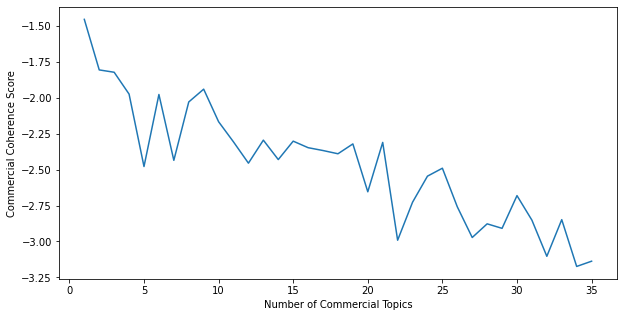

In [74]:
# Compute coherence for a big number of assumed topic numbers
comm_coherence = []
for nb_topics in range(1,36):
    comm_lda = LdaModel(comm_corpus, num_topics = nb_topics, id2word = comm_dictionary, passes=10)
    comm_cohm = CoherenceModel(model=comm_lda, corpus=comm_corpus, dictionary=comm_dictionary, coherence='u_mass')
    comm_coh = comm_cohm.get_coherence()
    comm_coherence.append(comm_coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,36),comm_coherence)
plt.xlabel("Number of Commercial Topics")
plt.ylabel("Commercial Coherence Score");

In [11]:
# Generate Top 9 topics summaries for COMMERCIAL posts
posts_group = "Commercial"
comm_no_of_topics = 9
top_n_words = 20
comm_lda = LdaModel(comm_corpus, num_topics = comm_no_of_topics, id2word = comm_dictionary, passes=10)

# Generate lists of words and frequencies
comm_top_words = [[word for word,_ in comm_lda.show_topic(topic_id, topn=50)] for topic_id in range(comm_lda.num_topics)]
comm_top_betas = [[beta for _,beta in comm_lda.show_topic(topic_id, topn=50)] for topic_id in range(comm_lda.num_topics)]

In [12]:
def plot_top_words(top_words, top_betas, nb_topics, nb_words, posts_group):
    gs  = gridspec.GridSpec(round(math.sqrt(nb_topics))+1,round(math.sqrt(nb_topics))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20, 15))
    for i in range(nb_topics):
      topic = i + 1
      ax = plt.subplot(gs[i])
      plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
      ax.invert_yaxis()
      ax.set_yticks(range(nb_words))
      ax.set_yticklabels(top_words[i][:nb_words])
      plt.title(posts_group + " Topic " + str(topic))

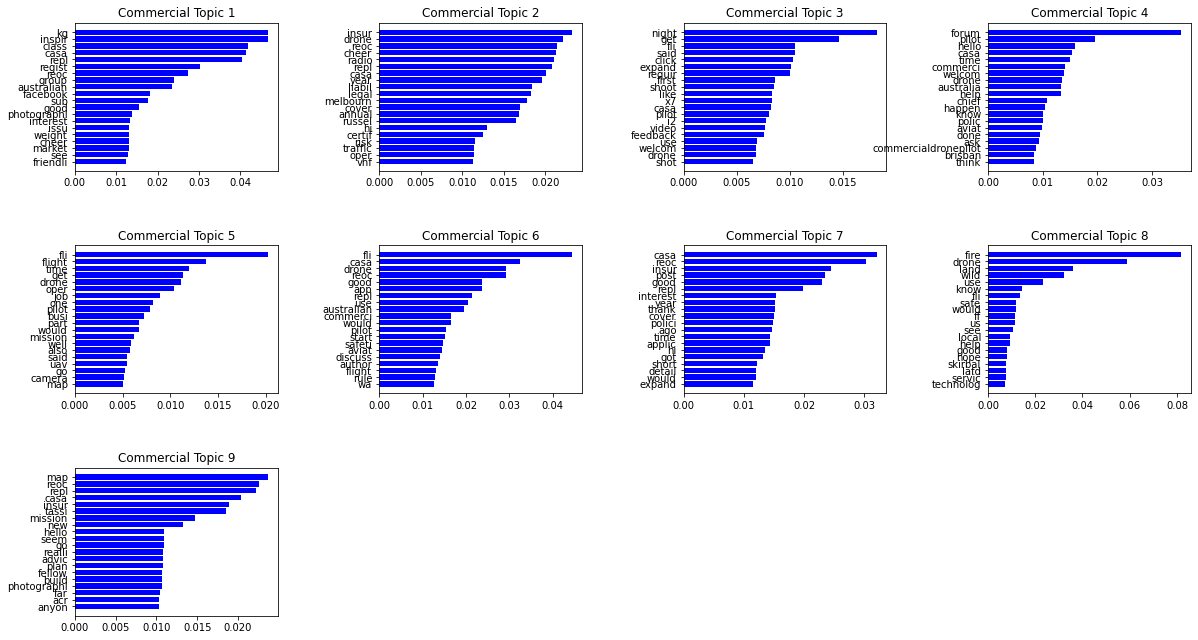

In [13]:
plot_top_words(comm_top_words, comm_top_betas, comm_no_of_topics, top_n_words, posts_group)

In [14]:
def wordcloud_top_words(top_words, top_betas, nb_topics, nb_words, posts_group):
    gs  = gridspec.GridSpec(round(math.sqrt(nb_topics))+1,round(math.sqrt(nb_topics))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
      words = top_words[i]
      betas = top_betas[i]
      zip_iterator = zip(words, betas)
      top_words_dict = dict(zip_iterator)
      wc = WordCloud(background_color="white", width=1600, height=1000, max_words=nb_words, 
                     relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(top_words_dict)

      topic = i + 1
      ax = plt.subplot(gs[i])
      ax.set_title(posts_group + " Topic " + str(topic))
      ax.axis('off')
      plt.imshow(wc)

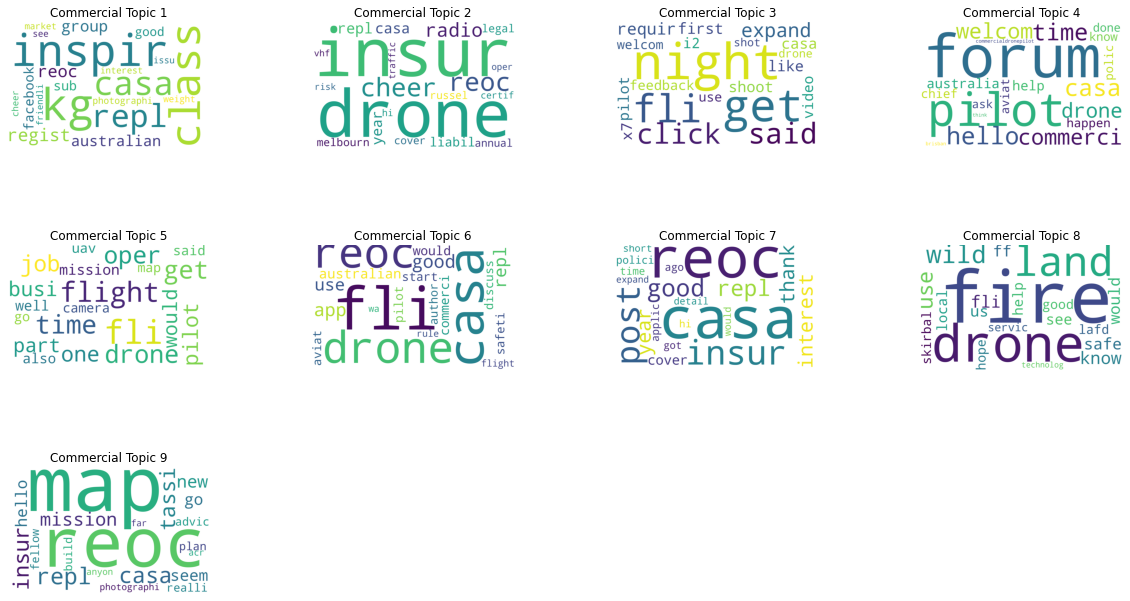

In [15]:
wordcloud_top_words(comm_top_words, comm_top_betas, comm_no_of_topics, top_n_words, posts_group)

**TOPIC MODELLING FOR PRIVATE POSTS**

In [16]:
# Build a dictionary where for each PRIVATE post, each word has its own id
priv_dictionary = Dictionary(dfPrivate.stemmed_text)

# Print the numbers of words and posts
priv_posts = len(dfPrivate)
priv_words = len(priv_dictionary)
print("PRIVATE:", priv_posts, "posts; ", priv_words, "words")

# build the corpus i.e. vectors with the number of occurence of each word per post
priv_corpus = [priv_dictionary.doc2bow(post) for post in dfPrivate.stemmed_text]

PRIVATE: 5052 posts;  6814 words


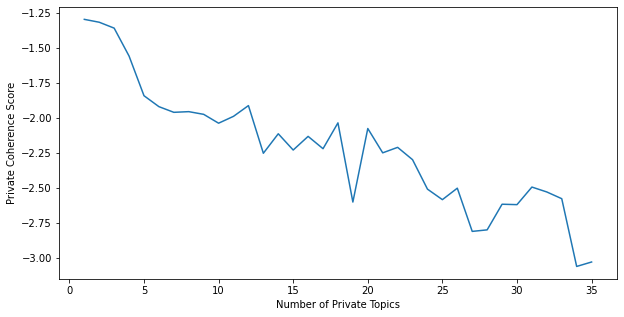

In [84]:
# Compute coherence for a big number of assumed topic numbers
priv_coherence = []
for nb_topics in range(1,36):
    priv_lda = LdaModel(priv_corpus, num_topics = nb_topics, id2word = priv_dictionary, passes=10)
    priv_cohm = CoherenceModel(model=priv_lda, corpus=priv_corpus, dictionary=priv_dictionary, coherence='u_mass')
    priv_coh = priv_cohm.get_coherence()
    priv_coherence.append(priv_coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,36),priv_coherence)
plt.xlabel("Number of Private Topics")
plt.ylabel("Private Coherence Score");

In [17]:
# Generate Top 5 topics summaries for PRIVATE posts
posts_group = "PRIVATE"
priv_no_of_topics = 9
top_n_words = 20
priv_lda = LdaModel(priv_corpus, num_topics = priv_no_of_topics, id2word = priv_dictionary, passes=10)

# Generate lists of words and frequencies
priv_top_words = [[word for word,_ in priv_lda.show_topic(topic_id, topn=50)] for topic_id in range(priv_lda.num_topics)]
priv_top_betas = [[beta for _,beta in priv_lda.show_topic(topic_id, topn=50)] for topic_id in range(priv_lda.num_topics)]

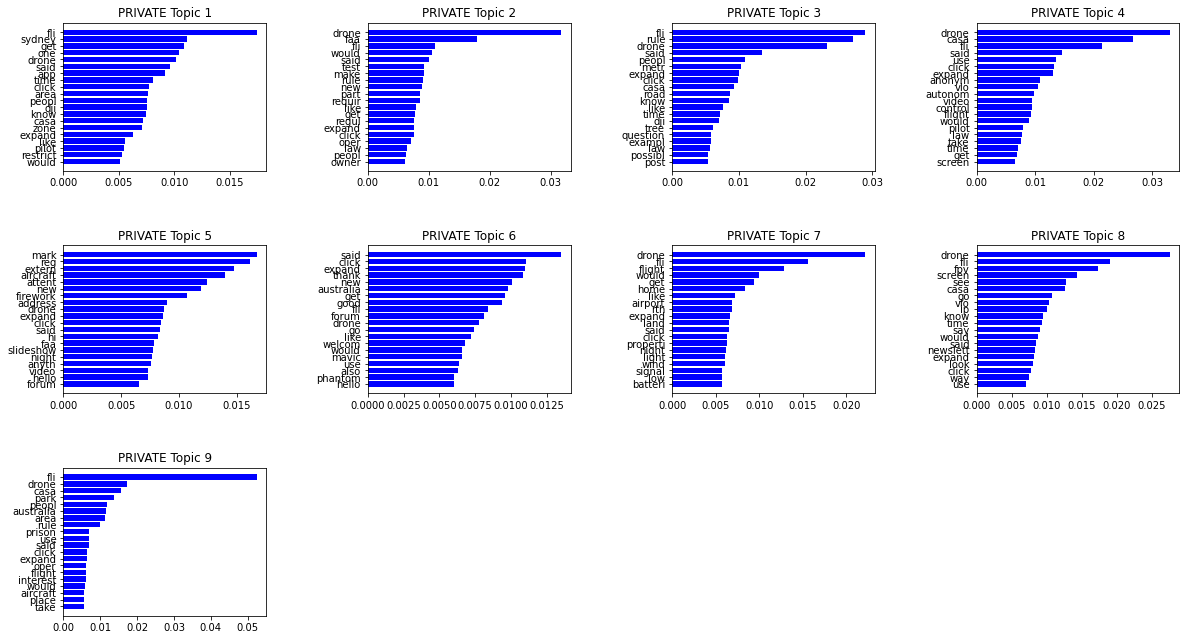

In [18]:
plot_top_words(priv_top_words, priv_top_betas, priv_no_of_topics, top_n_words, posts_group)

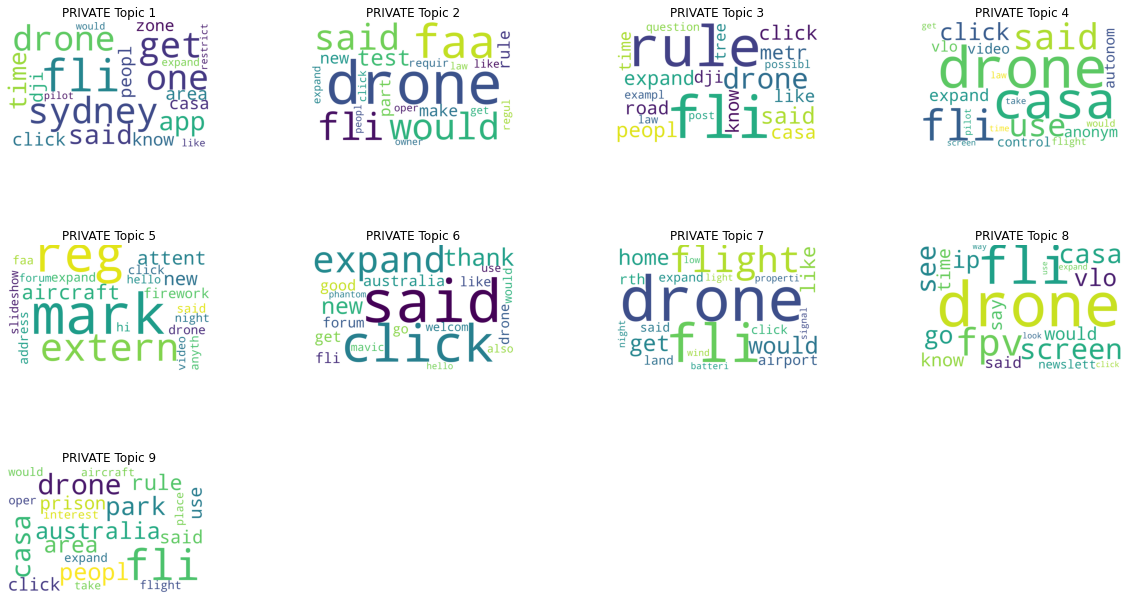

In [19]:
wordcloud_top_words(priv_top_words, priv_top_betas, priv_no_of_topics, top_n_words, posts_group)